# neural_xray: Example notebook for using neural rendering for X-ray data


Credit to [NeX](https://nex-mpi.github.io/) and nerfstudio for Google Colab format.

## Common errors

* **Optimizer loading errror:**

  ```
        self.optimizers.load_optimizers(loaded_state["optimizers"])                          
        KeyError: 'optimizers'
  ```
  This is an error that typically occurs when a velocity field training run fails and you are trying to restart it. The fact that folder `outputs/[data]/xray_vfield/[res]` exists means that the script is trying to load pre-trained optimizer. Delete the folder before restarting the velocity field training run.



In [ ]:
# @markdown <h1>Install Nerfstudio and Dependencies (~8 min)</h1>

%cd /content/
!pip install --upgrade pip
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu124

# Installing TinyCuda
%cd /content/
!curl -L "https://github.com/igrega348/tiny-cuda-nn-wheels/releases/download/1.7.3/tinycudann-2.0.post75260124-cp312-cp312-linux_x86_64.whl" -o tinycudann-2.0.post75260124-cp312-cp312-linux_x86_64.whl
!pip install tinycudann-2.0.post75260124-cp312-cp312-linux_x86_64.whl --force-reinstall

# Installing COLMAP
%cd /content/
!apt-get install colmap

# Install imagemagick
!apt-get install imagemagick


# Install nerfstudio
%cd /content/
!git clone https://github.com/igrega348/neural_xray.git --recurse-submodules
%cd /content/neural_xray/nerfstudio/
!pip install -e .
%cd /content/neural_xray/nerfstudio-xray/nerf-xray/
!pip install -e .
%cd /content/neural_xray/xray_projection_render/
!pip install -e .

# Load tensorboard notebook extension
%load_ext tensorboard

In [ ]:
# @markdown <h1>Generate data</h1>

%cd /content/neural_xray/scripts/
!./generate_and_animate.sh

Rotation Animation,Deformation Animation

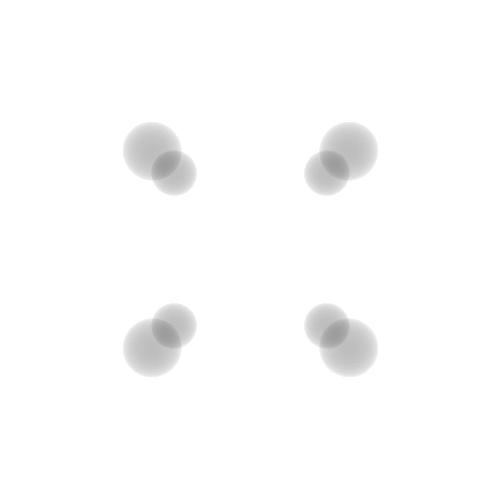
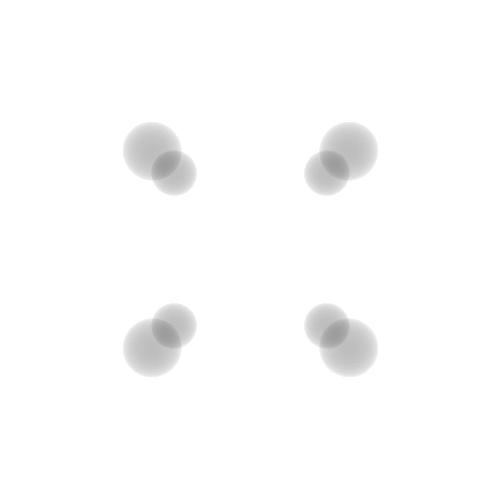

In [ ]:
from IPython.display import HTML
import base64
import io

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

rotation_gif_base64 = get_base64_encoded_image('/content/neural_xray/data/synthetic/balls/rotation_animation.gif')
deformation_gif_base64 = get_base64_encoded_image('/content/neural_xray/data/synthetic/balls/deformation_animation.gif')

html_content = f"""
<table style="width:100%;">
  <tr>
    <td style="text-align:center; padding:10px;">
      <h3>Rotation Animation</h3>
      <img src="data:image/gif;base64,{rotation_gif_base64}" style="max-width:100%; height:auto;">
    </td>
    <td style="text-align:center; padding:10px;">
      <h3>Deformation Animation</h3>
      <img src="data:image/gif;base64,{deformation_gif_base64}" style="max-width:100%; height:auto;">
    </td>
  </tr>
</table>
"""
display(HTML(html_content))

In [ ]:
# @markdown <h1>Start Training</h1>
# @markdown The training loop takes ~30 mins on T4 Google Colab

%cd /content
!pip install colab-xterm
%load_ext colabxterm
%env TERM=xterm
from IPython.display import clear_output
import os

clear_output(wait=True)
if os.path.exists(f"/content/neural_xray/data/synthetic/balls/transforms_00.json"):
    print(
        "\033[1m"
        + "Copy and paste the following command into the terminal window that pops up under this cell."
        + "\033[0m"
    )
    print(
        f"bash /content/neural_xray/scripts/demo_synthetic.sh"
        )
    print()
    print("After training starts, move to Tensorboard visualization in the cell below")
    print()
    %xterm
else:
    from IPython.core.display import HTML, display

    display(HTML('<h3 style="color:red">Error: Data processing did not complete</h3>'))
    display(HTML("<h3>Please re-run `Downloading and Processing Data`, or view the FAQ for more info.</h3>"))

Copy and paste the following command into the terminal window that pops up under this cell.
bash /content/neural_xray/scripts/demo_synthetic.sh

After training starts, move to Tensorboard visualization in the cell below



Launching Xterm...

In [ ]:
# @markdown <h1>Tensorboard visualization</h1>
# @markdown Key metrics to watch: eval metrics dict/mismatch_penalty, normed_correlation, psnr, and eval images
# TensorBoard
%tensorboard --logdir /content/neural_xray/outputs/balls/